In [1]:
import pandas as pd
customer_loans = pd.read_csv("E:\WilmingtonConsultingLimitedyeJan2015\AICore\exploratory-data-analysis---customer-loans-in-finance908\loan_payments.csv")
shape = customer_loans.shape
print(f"This dataset has {shape[0]} rows and {shape[1]} column")
pd.set_option("display.max_columns", None)
customer_loans.head(10)


This dataset has 54231 rows and 43 column


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,B4,< 1 year,OWN,32000.0,Source Verified,Jan-2021,Current,n,home_improvement,6.60,1,Mar-2011,0,8.0,NaN,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,NaN,RENT,13536.0,Verified,Jan-2021,Fully Paid,n,debt_consolidation,16.13,0,Nov-2006,2,NaN,NaN,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,< 1 year,RENT,78000.0,Source Verified,Jan-2021,Charged Off,n,debt_consolidation,13.71,0,Mar-2001,0,43.0,NaN,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,C2,< 1 year,RENT,50048.0,Source Verified,Jan-2021,Current,n,credit_card,20.67,0,Nov-2005,0,NaN,NaN,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,A5,10+ years,MORTGAGE,103000.0,Not Verified,Jan-2021,Current,n,credit_card,15.95,0,Feb-2002,1,35.0,NaN,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


Let's visualise the nulls in the dataset using missingno_plot method.

<Axes: >

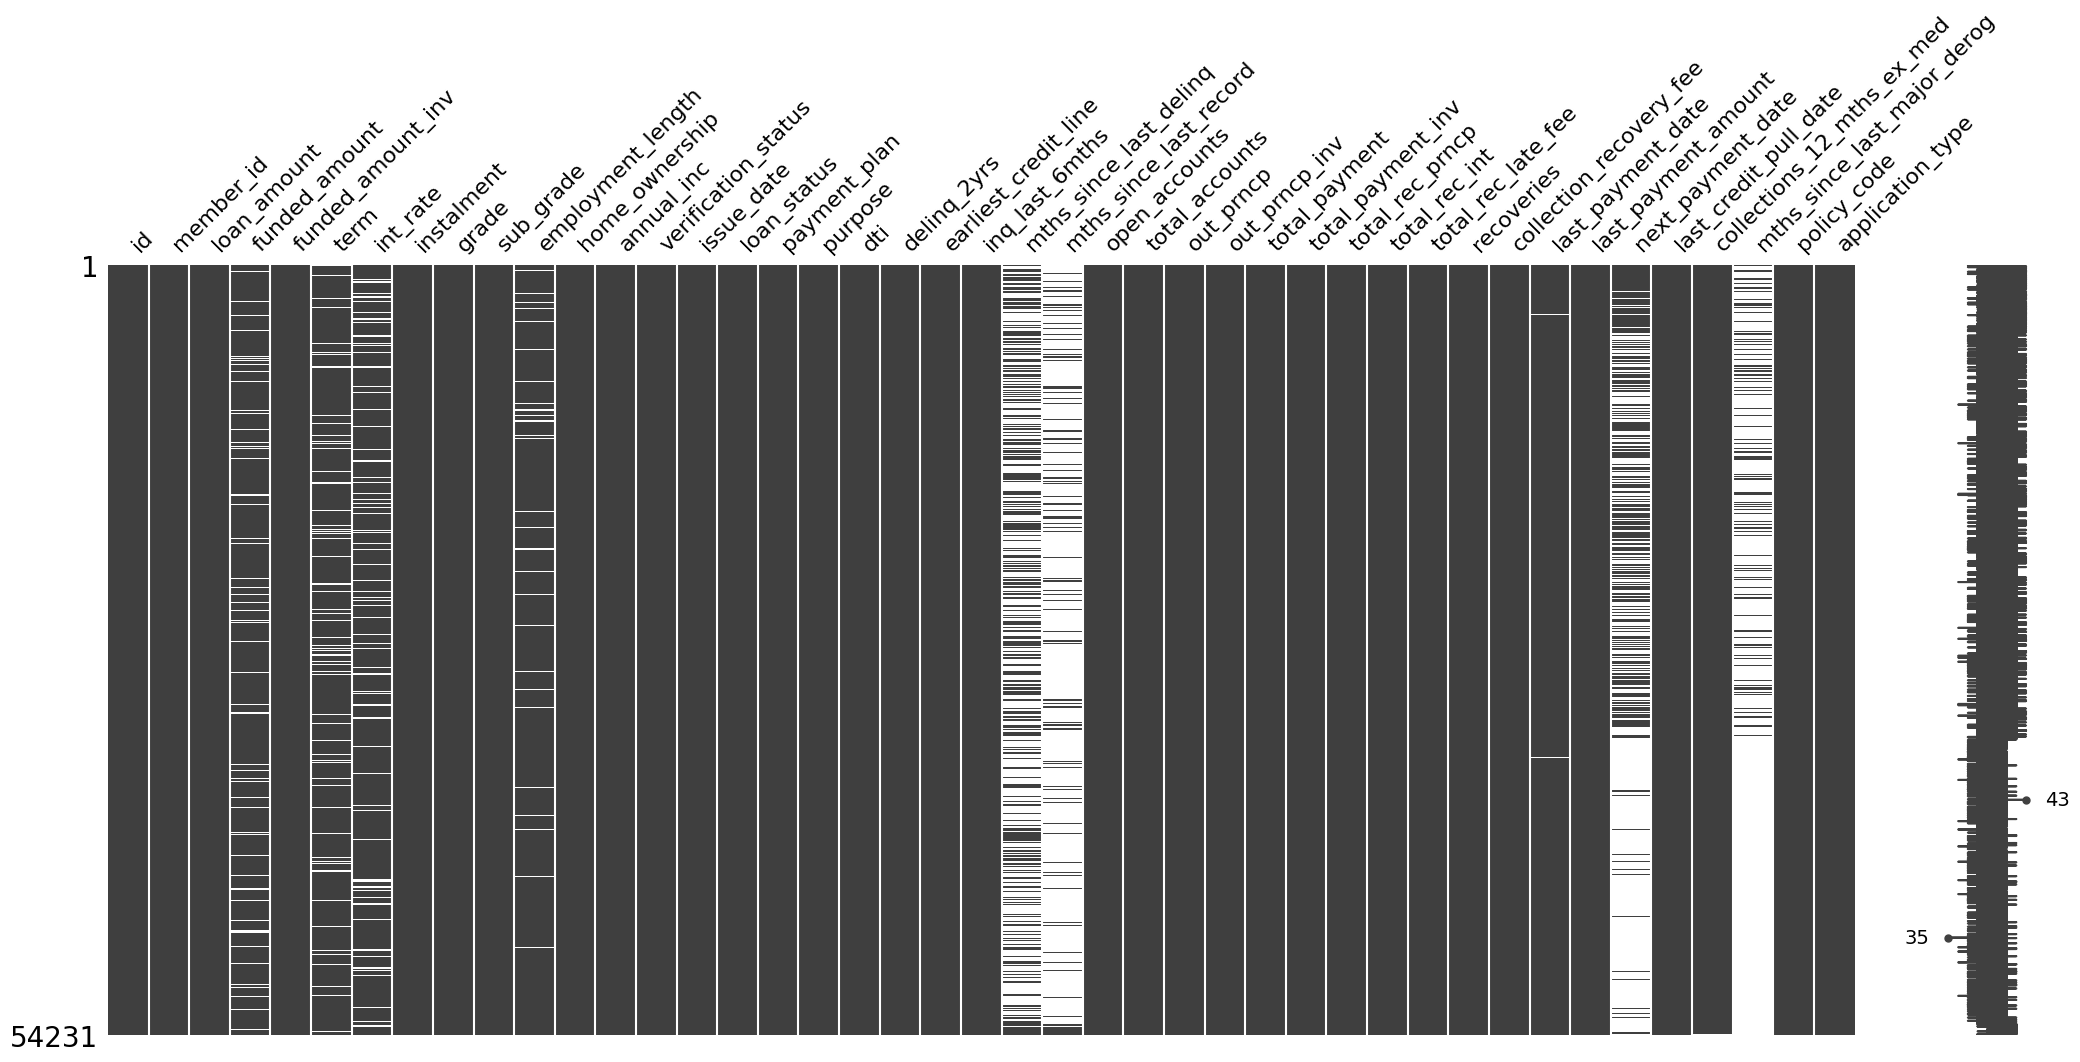

In [2]:
from df_null_imputes import DataFrameTransform
null_matrix = DataFrameTransform(customer_loans)
null_matrix.missingno_plot(customer_loans)

In [3]:
customer_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

This allows a high-level analysis of the data, initially to ascertain whether each column in the dataframe is in an appropriate form and data type.
From initial review, the following observations were made:
-   Columns that contained dates were not in an ideal format - currently data type object, as mix of str and int. These should be converted to datetime data type (YEAR-MONTH-DAY).
-   Columns such as "term" and "employment_length" could be a numerical data type, however there were unecessary characters such as "months" (in "term"), and "years", "<" and "+" (in "employment_length"). I will investigate further to see if categorical would be appropriate.
-   There are many columns with object data type, when they are made up of a finite list of text values and should more appropriately be category data type (Eg "grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "policy_code" and "application_type")
I have investigated below appropriate conversions.


Experimentation with initial columns:\
term - remove unwanted "months" and cast to float data type.\
employment_length -  it is possible to extract numerical value and remove unwanted characters "years", "<" and "+". However, having investigated possible values it became clear that "employment_length" is categorical in nature. It was considered how best to treat <1 year and 10+ years. In the absense of any further detail, it would not be possible to know whether 10+ years meant 10.5 years, 12 years or 20 years etc. Equally, it would not be possible to know whether <1 year meant 1 month, 6 months or 11 months. Hence, it was considered best to allocate values to categories.\
home_ownership - cast to category data type.\
issue_date - cast to datetime data type.

In [4]:
customer_loans["employment_length"].value_counts()

employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: count, dtype: int64

In [5]:
customer_loans['term'] = customer_loans['term'].str.extract('(\d+)', expand=False).astype(float)
emp_length = {"10+ years" : 11, "9 years" : 10, "8 years" : 9, "7 years" : 8, "6 years" : 7, "5 years" : 6, "4 years" : 5, "3 years" : 4, "2 years" : 3, "1 year" : 2, "< 1 year" : 1}
customer_loans["employment_length"] = customer_loans["employment_length"].map(emp_length)
    #customer_loans['employment_length'] = customer_loans['employment_length'].apply(lambda x :''.join(char for char in str(x) if char.isnumeric()))
customer_loans["home_ownership"] = customer_loans["home_ownership"].astype("category")
customer_loans["issue_date"] = pd.to_datetime(customer_loans["issue_date"])
customer_loans.info()
customer_loans.head()

C:\Users\Darrenlevene\AppData\Local\Temp\ipykernel_15636\1444239405.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_loans["issue_date"] = pd.to_datetime(customer_loans["issue_date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


Investigate unique values in columns that appear categorical.

In [6]:
import numpy as np
categorical_columns = ["id", "member_id", "term", "grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "payment_plan", "purpose", "delinq_2yrs", "inq_last_6mths", "open_accounts", "total_accounts", "policy_code", "application_type", "employment_length", "collections_12_mths_ex_med"]
for column in categorical_columns:
    print(np.sort(customer_loans[column].unique()))

          


[   55521    55742    56413 ... 38656154 38656203 38676116]
[   70694    70699    70978 ... 41439961 41440010 41461848]
[36. 60. nan]
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']
['MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']
['Not Verified' 'Source Verified' 'Verified']
['Charged Off' 'Current' 'Default'
 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid' 'Fully Paid'
 'In Grace Period' 'Late (16-30 days)' 'Late (31-120 days)']
['n' 'y']
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 24 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 

Use convert_to_datetime method to transform date columns into datetime data type format\
Use cast_to_category method to transform columns more appropriate for category data type\
Use convert_to_categorical method to transform "grade" and "sub_grade" columns to categorical numerical values\
grade: A:0, B:1, C:2 etc\
sub_grade: A1:0, A2:1, A3:2 etc


In [7]:
from df_transformations import DataTransform

date_columns = ["earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"]
cat_columns = ["id", "member_id", "verification_status", "loan_status", "payment_plan", "purpose", "application_type", "sub_grade", "grade", "delinq_2yrs", "inq_last_6mths", "open_accounts", "total_accounts", "collections_12_mths_ex_med", "policy_code"]
categorical_columns = ["grade", "sub_grade"]

transformer = DataTransform(customer_loans)

for column in date_columns:
    transformer.convert_to_datetime(column)

for column in categorical_columns:
    transformer.convert_to_categorical(column)

for column in cat_columns:
    transformer.cast_to_category(column)


customer_loans.head(10)

e:\WilmingtonConsultingLimitedyeJan2015\AICore\exploratory-data-analysis---customer-loans-in-finance908\df_transformations.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])
e:\WilmingtonConsultingLimitedyeJan2015\AICore\exploratory-data-analysis---customer-loans-in-finance908\df_transformations.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])
e:\WilmingtonConsultingLimitedyeJan2015\AICore\exploratory-data-analysis---customer-loans-in-finance908\df_transformations.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consist

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36.0,11.44,83.20,1,8,1.0,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,8.0,NaN,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,4,24,NaN,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,NaN,NaN,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,NaT,2021-03-01,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,4,22,1.0,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,43.0,NaN,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,NaT,2022-01-01,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60.0,12.99,227.48,2,11,1.0,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,NaN,NaN,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36.0,8.19,314.25,0,4,11.0,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,35.0,NaN,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


Checking that column data type transformations have been done successfully

In [8]:
customer_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  category      
 1   member_id                    54231 non-null  category      
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

Let us apply methods in class DataFrameInfo to the Data Frame, which will extract information from the Data Frame and its columns:\
df_unique_values - method to summarise the frequency of unique values within a category column\
df_shape - method to print the total number of rows and columns in the Data Frame\
df_datatype_info - method to summarise the data type of each column and the number of non-nulls in each column\
df_stats_summary - method to summarise statistical data (such as count, mean, standard deviation) for a specified numerical column\
df_percent_null - method to calculate the percentage of null values for each column in the data frame

In [9]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_shape()

This dataset has 54231 rows and 43 columns


In [10]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_datatype_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  category      
 1   member_id                    54231 non-null  category      
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  float64       
 11  home_ownership               54231 non-nu

In [11]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_unique_values("purpose")

purpose
debt_consolidation    29593
credit_card           11133
other                  3697
home_improvement       3215
major_purchase         1679
small_business         1312
car                    1022
medical                 631
wedding                 539
moving                  456
house                   354
vacation                320
educational             201
renewable_energy         79
Name: count, dtype: int64

In [12]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_stats_summary("int_rate")

count    49062.000000
mean        13.507328
std          4.392893
min          5.420000
25%         10.370000
50%         13.160000
75%         16.200000
max         26.060000
Name: int_rate, dtype: float64

In [13]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_percent_null()


id                              0.00
member_id                       0.00
loan_amount                     0.00
funded_amount                   5.54
funded_amount_inv               0.00
term                            8.80
int_rate                        9.53
instalment                      0.00
grade                           0.00
sub_grade                       0.00
employment_length               3.91
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_date                      0.00
loan_status                     0.00
payment_plan                    0.00
purpose                         0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_credit_line            0.00
inq_last_6mths                  0.00
mths_since_last_delinq         57.17
mths_since_last_record         88.60
open_accounts                   0.00
total_accounts                  0.00
out_prncp                       0.00
o

Based on an initial analysis of the variables in the data frame that have null values:
-   "last_payment_date" (0.13%), "last_credit_pull_date" (0.01%) and "collections_12_mths_ex_med" (0.09%) all have a tiny percentage of null values (and much <1%). To put that into context the highest number of null values out of these was "last_payment_date", which has 73 null values out of a possible total of 54,231. Hence, I considered it appropriate to remove these rows given how small these numbers were as compared to the data set as a whole.

-   "mnths_since_last_delinq" (57.17%), "mnths_since_last_record" (88.60%), "next_payment_date" (60.13%) and "mths_since_last_major_derog" (86.17%) have a very significant proportion of null values. Hence, removing these rows was discounted as it would result in losing the majority of the data set. Hence, given the very large proportion of null values with these variables it was concluded that imputing their values would be very difficult to do and so it was concluded that these variables should be removed from the data set. 

-   "funded_amount" (5.54%), "term" (8.80%), "employment_length" (3.91%) and "int_rate" (9.53%) all had significant numbers of null values that would be worthwhile imputing by an appropriate method.

The first method to implement is drop_rows, to remove rows conatining nulls in those columns with very small proprortion of nulls as a whole.

In [14]:
#Method to drop rows where nulls <1%
from df_null_imputes import DataFrameTransform
row_drop_var = DataFrameTransform(customer_loans)
row_drop_var.drop_rows("last_payment_date")
row_drop_var.drop_rows("last_credit_pull_date")
row_drop_var.drop_rows("collections_12_mths_ex_med")

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.00,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.00,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.00,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.00,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.00,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,55521,107577,1000,1000.0,0.00,36.0,16.08,35.20,5,26,1.0,RENT,30000.0,Not Verified,2014-07-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,23.84,0,2001-08-01,1,NaN,NaN,9,15,0.00,0.00,1207.76,0.00,999.99,207.77,0.000000,0.0,0.0,2016-03-01,538.97,2016-04-01,2016-03-01,0.0,NaN,1,INDIVIDUAL
54203,185352,105254,6000,6000.0,502.69,36.0,9.64,192.60,1,8,2.0,RENT,18000.0,Not Verified,2013-12-01,Fully Paid,n,debt_consolidation,2.87,0,2004-08-01,1,0.0,0.0,4,4,0.00,0.00,6933.05,544.67,5999.99,933.06,0.000000,0.0,0.0,2016-12-01,193.55,NaT,2016-12-01,0.0,NaN,1,INDIVIDUAL
54204,122637,104675,4000,4000.0,1550.00,36.0,7.75,124.89,0,2,2.0,OWN,61800.0,Not Verified,2013-08-01,Fully Paid,n,other,3.46,0,2000-09-01,0,0.0,0.0,12,16,0.00,0.00,4495.79,1742.14,4000.00,495.79,0.000000,0.0,0.0,2016-09-01,126.29,NaT,2016-08-01,0.0,NaN,1,INDIVIDUAL
54221,395632,91027,5500,5500.0,5450.00,36.0,13.16,185.74,2,12,1.0,RENT,21000.0,Verified,2015-07-01,Does not meet the credit policy. Status:Fully ...,n,car,19.20,0,1979-08-01,4,NaN,NaN,5,6,0.00,0.00,5803.77,5751.01,5500.00,303.77,0.000000,0.0,0.0,2016-10-01,85.66,2016-11-01,2021-04-01,0.0,NaN,1,INDIVIDUAL


We can observe that there are no longer any nulls in the columns where rows with nulls were removed above.

In [15]:
customer_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54100 non-null  category      
 1   member_id                    54100 non-null  category      
 2   loan_amount                  54100 non-null  int64         
 3   funded_amount                51102 non-null  float64       
 4   funded_amount_inv            54100 non-null  float64       
 5   term                         49338 non-null  float64       
 6   int_rate                     48941 non-null  float64       
 7   instalment                   54100 non-null  float64       
 8   grade                        54100 non-null  category      
 9   sub_grade                    54100 non-null  category      
 10  employment_length            51986 non-null  float64       
 11  home_ownership               54100 non-null  c

Next, is to implement drop_columns method to entirely remove the columns identified as having a very high percentage of null values. This can be seen below.

In [16]:
#Method to drop columns where nulls are a significant percentage and at least >50%
from df_null_imputes import DataFrameTransform
column_drop_var = DataFrameTransform(customer_loans)
column_drop_var.drop_columns(["mths_since_last_record", "mths_since_last_delinq", "mths_since_last_major_derog", "next_payment_date"])
customer_loans.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36.0,11.44,83.20,1,8,1.0,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,4,24,NaN,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,4,22,1.0,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60.0,12.99,227.48,2,11,1.0,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36.0,8.19,314.25,0,4,11.0,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,0.0,1,INDIVIDUAL


In [17]:
customer_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  category      
 1   member_id                   54100 non-null  category      
 2   loan_amount                 54100 non-null  int64         
 3   funded_amount               51102 non-null  float64       
 4   funded_amount_inv           54100 non-null  float64       
 5   term                        49338 non-null  float64       
 6   int_rate                    48941 non-null  float64       
 7   instalment                  54100 non-null  float64       
 8   grade                       54100 non-null  category      
 9   sub_grade                   54100 non-null  category      
 10  employment_length           51986 non-null  float64       
 11  home_ownership              54100 non-null  category      


Finally, we are left with columns that have a percentage of nulls that were deemed worthwhile to impute by an appropriate method. These nulls were imputed using imputed_median or imputed_mean methods. The info below confirms all nulls had been dealt with.

In [18]:
from df_null_imputes import DataFrameTransform
imputed_column = DataFrameTransform(customer_loans)
imputed_column.imputed_median("funded_amount")
imputed_column.imputed_median("term")
imputed_column.imputed_median("employment_length")
imputed_column.imputed_mean("int_rate")
customer_loans.head(10)


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36.0,11.44,83.20,1,8,1.0,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,36.0,21.99,254.89,4,24,7.0,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,36.0,19.99,701.95,4,22,1.0,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60.0,12.99,227.48,2,11,1.0,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,10000,12000.0,10000.0,36.0,8.19,314.25,0,4,11.0,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,0.0,1,INDIVIDUAL


It was decided that it was best suited to convert complete "employment_length" column to categorical.

In [19]:
from df_transformations import DataTransform
transformer = DataTransform(customer_loans)
transformer.cast_to_category("employment_length")

In [20]:
customer_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  category      
 1   member_id                   54100 non-null  category      
 2   loan_amount                 54100 non-null  int64         
 3   funded_amount               54100 non-null  float64       
 4   funded_amount_inv           54100 non-null  float64       
 5   term                        54100 non-null  float64       
 6   int_rate                    54100 non-null  float64       
 7   instalment                  54100 non-null  float64       
 8   grade                       54100 non-null  category      
 9   sub_grade                   54100 non-null  category      
 10  employment_length           54100 non-null  category      
 11  home_ownership              54100 non-null  category      


Lets use df_percent_null method to check that all nulls have been removed

In [21]:
from df_info import DataFrameInfo
info = DataFrameInfo(customer_loans)
info.df_percent_null()

id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
total_rec_int 

Let's redo missingno matrix, using missingno_plot method to visually confirm that nulls have been removed

<Axes: >

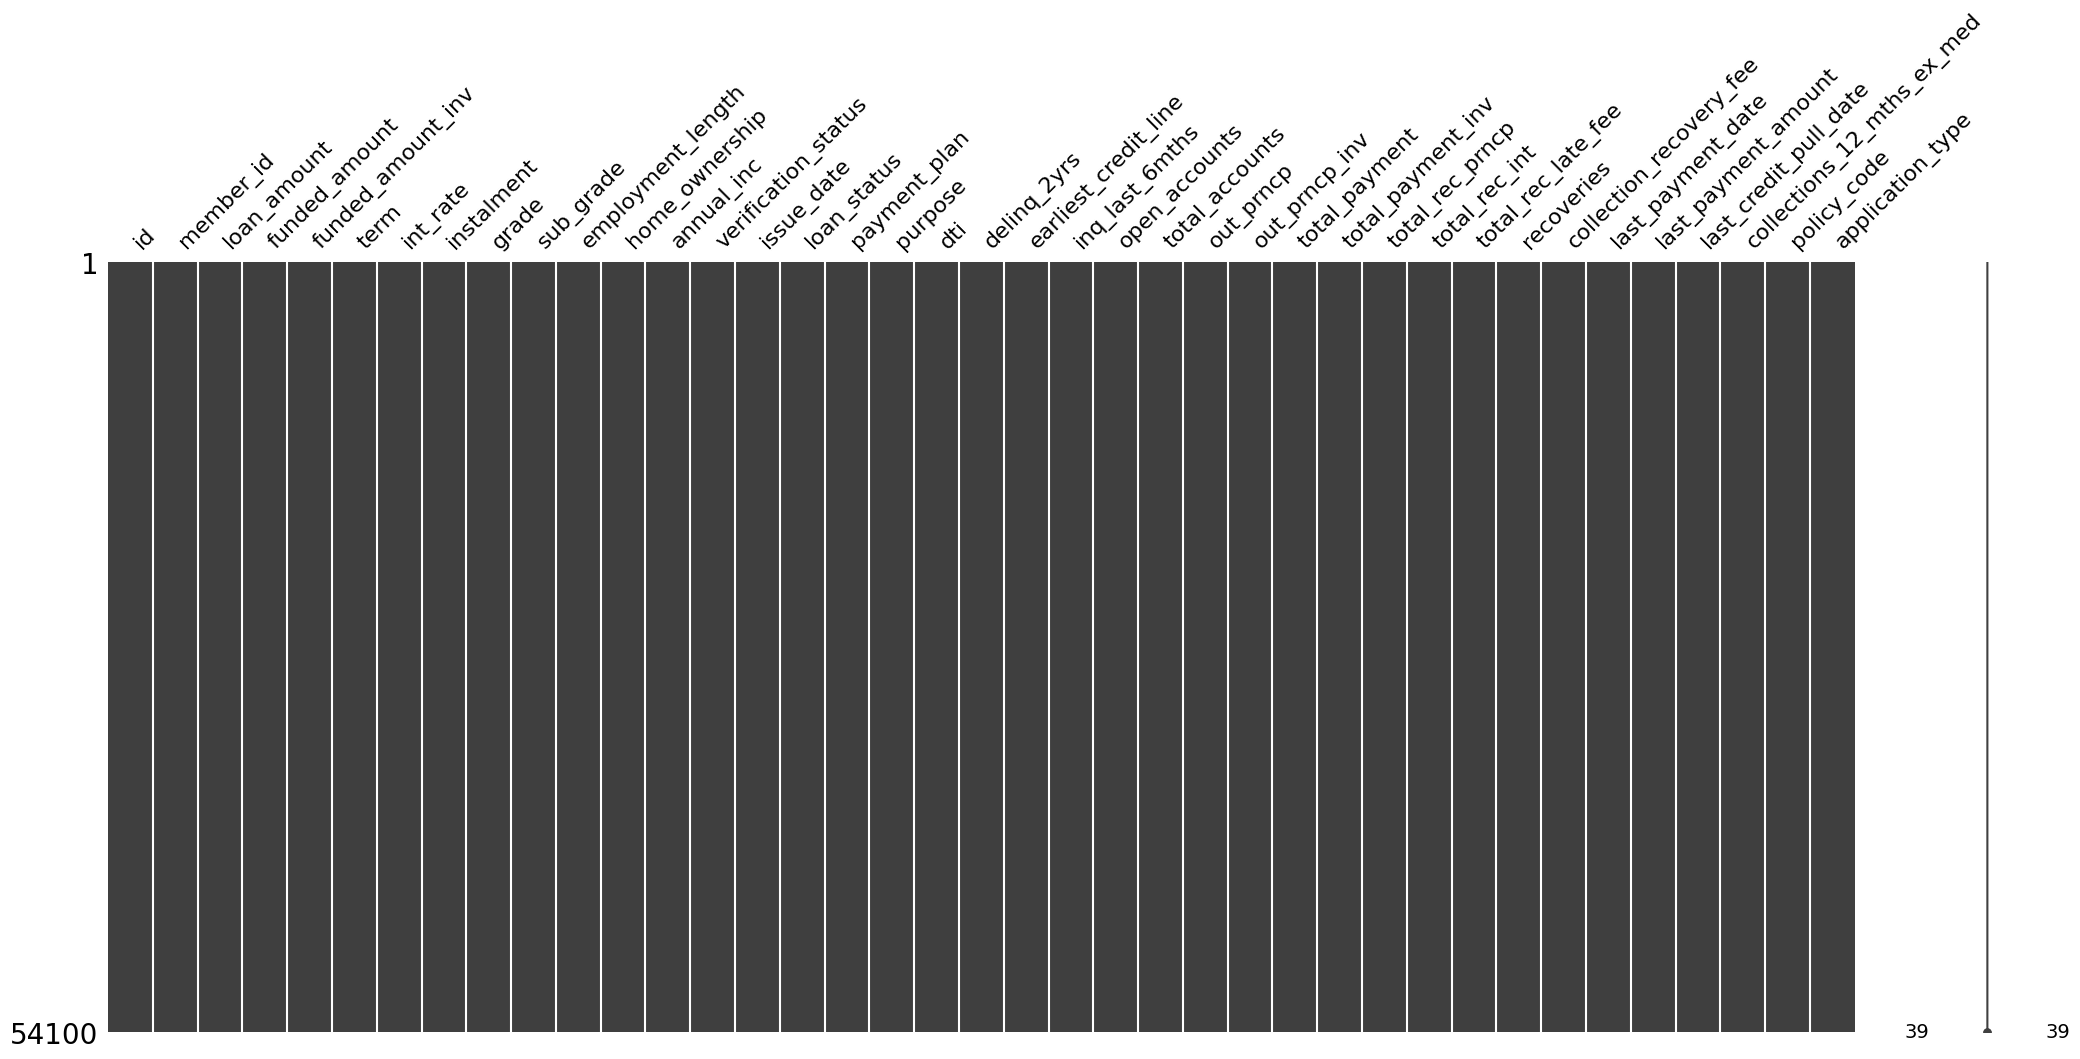

In [22]:
from df_null_imputes import DataFrameTransform
null_matrix = DataFrameTransform(customer_loans)
null_matrix.missingno_plot(customer_loans)


We now look to visualise insights from the data using a variety of data_visualisation methods:

-   Histogram - plot which displays the distribution of a variable n terms of frequency counts 
-   Kernel Density Estimate (KDE) Plot - similar to Histogram, overlaid with a smoothed and interpolated curve showing the probability density function
-   Violin Plot - represents mirrored density estimates for a variable
-   Box Plot - graphical representation of statistical data of a variable based on minimum, first quartile, median, third quartile and maximum. Also shows full range of data including ouliers.
-   QQ_plot - visual representation of sample distribution of a variable against a theoretical normal distribution. Deviations from the straight line suggest departures from the assumed distribution.
-   Correlation Matrix - visual heatmap that display the correlation coeffcients between pairs of variables in a dataset.
-   Missingno Matrix - this is a visual representation of the dataset showing null values

Histogram

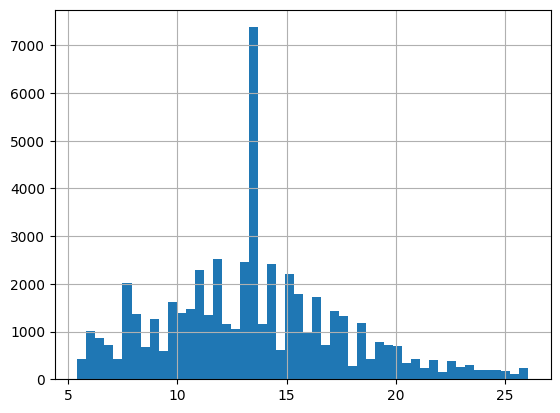

In [23]:
from data_visualisation import Plotter
hist_var = Plotter(customer_loans)
hist_var.histogram_plot("int_rate", customer_loans)

Kernel Density Estimate Plot

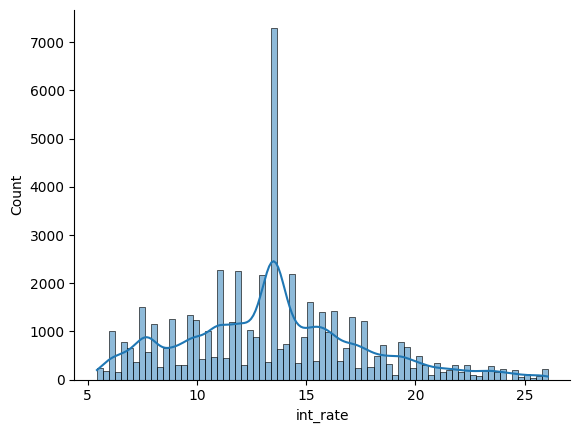

In [24]:
from data_visualisation import Plotter
kde_var = Plotter(customer_loans)
kde_var.kernel_density_estimate_plot("int_rate", customer_loans)


Violin Plot

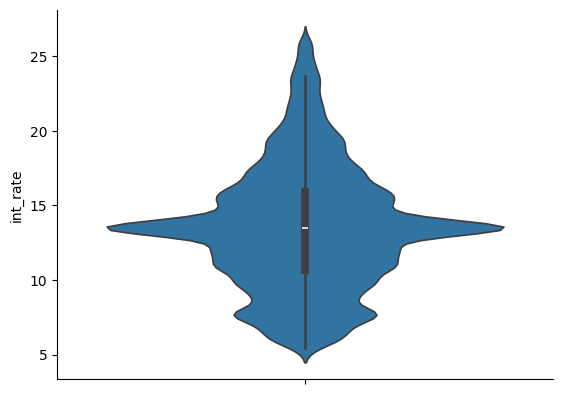

In [25]:
from data_visualisation import Plotter
violin_var = Plotter(customer_loans)
violin_var.violin_plot("int_rate", customer_loans)

Box Plot

In [26]:
from data_visualisation import Plotter
box_plot_var = Plotter(customer_loans)
box_plot_var.box_and_whiskers_plot("int_rate", customer_loans)

QQ Plot

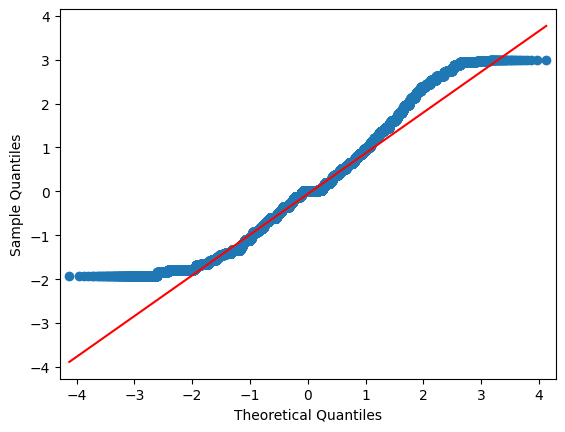

In [27]:
from data_visualisation import Plotter
qq_plot_var = Plotter(customer_loans)
qq_plot_var.qq_plotter("int_rate", customer_loans)

Correlation Matrix

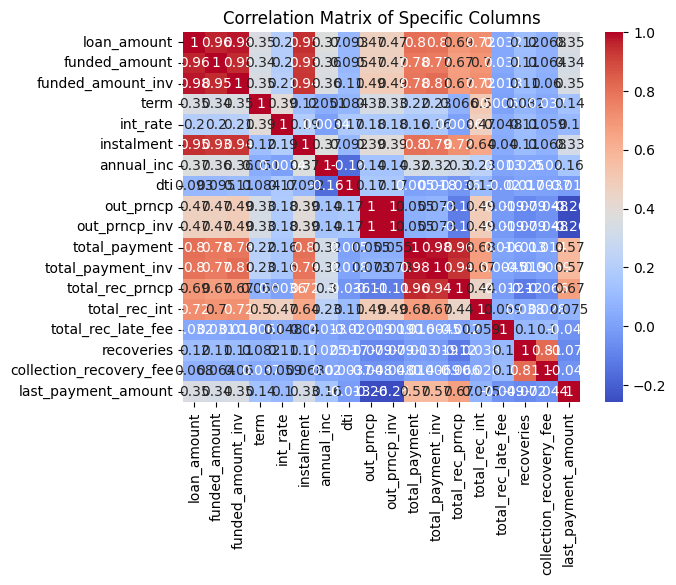

In [28]:
from data_visualisation import Plotter
import matplotlib.pyplot as plt
heatmap_var = Plotter(customer_loans)
heatmap_var.correlation_heatmap(customer_loans)
plt.title("Correlation Matrix of Specific Columns")
plt.yticks(rotation = 0)
plt.show()


Let us analyse how skewed the data is for numerical columns in customer_loans data frame.

In [29]:
customer_loans.skew(numeric_only = True)

loan_amount                 0.804312
funded_amount               0.869102
funded_amount_inv           0.814251
term                        1.146332
int_rate                    0.432686
instalment                  0.996150
annual_inc                  8.735737
dti                         0.189020
out_prncp                   2.352526
out_prncp_inv               2.352946
total_payment               1.269266
total_payment_inv           1.258474
total_rec_prncp             1.262007
total_rec_int               2.203625
total_rec_late_fee         13.258472
recoveries                 14.382675
collection_recovery_fee    27.794716
last_payment_amount         2.496079
dtype: float64

Let us investigate columns that have extremely high skew.

In [30]:
customer_loans["collection_recovery_fee"].value_counts()

collection_recovery_fee
0.0000      50715
1.4400          7
4.0200          6
1.6900          6
2.0800          6
            ...  
912.1730        1
506.8728        1
75.6270         1
2.7103          1
444.2500        1
Name: count, Length: 2908, dtype: int64

In [31]:
customer_loans["recoveries"].value_counts()

recoveries
0.000000       50496
19.200000          3
9.800000           3
16.270000          3
689.960000         2
               ...  
3703.190000        1
1089.140000        1
947.160000         1
1417.310000        1
1254.398838        1
Name: count, Length: 3540, dtype: int64

In [32]:
customer_loans["total_rec_late_fee"].value_counts()

total_rec_late_fee
0.000000      52349
15.000000       251
30.000000        29
24.910000         4
32.730000         4
              ...  
19.962410         1
38.959484         1
14.923354         1
0.010000          1
104.942381        1
Name: count, Length: 1429, dtype: int64

Based on this it is apparent that these variables have an extremely high percentage of values at 0, which explains the high skew.

Let us visualise data with QQ Plot and KDE Plot for "loan_amount" which is skew of 0.804

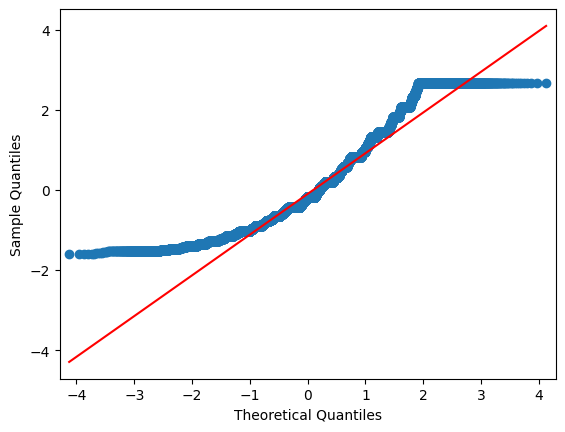

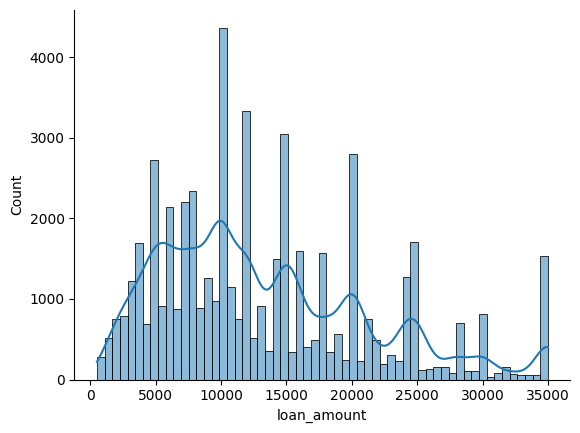

In [33]:
from data_visualisation import Plotter
qq_plot_var = Plotter(customer_loans)
qq_plot_var.qq_plotter("loan_amount", customer_loans)

kde_var = Plotter(customer_loans)
kde_var.kernel_density_estimate_plot("loan_amount", customer_loans)

Let us visualise data with QQ Plot and KDE Plot for "int_rate" which is skew of 0.433

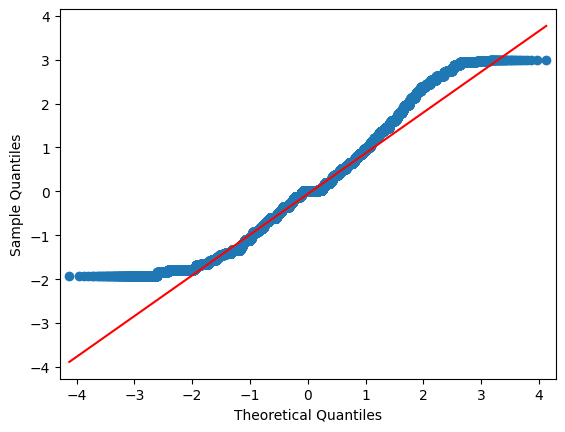

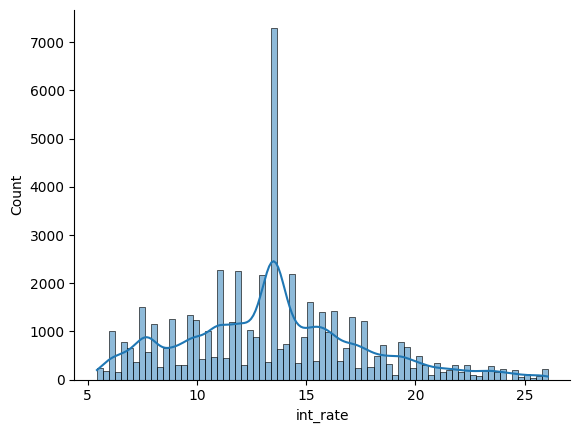

In [34]:
from data_visualisation import Plotter
qq_plot_var = Plotter(customer_loans)
qq_plot_var.qq_plotter("int_rate", customer_loans)

kde_var = Plotter(customer_loans)
kde_var.kernel_density_estimate_plot("int_rate", customer_loans)

When we analyse the visual representations for "loan_amount" variable (skew 0.804) and "int_rate" variable (skew 0.433), the "int_rate" QQ Plot matches the theoretical normal distribution line more closely than "loan_amount". The KDE Plot for "loan_amount" shows a more obvious asymmetrical positive skew, whereas the KDE Plot for "int_rate" appears much more symmetrical and thereby closer to a normal distribution.

It was therefore concluded, that any variables that have a skew between -0.5 and 0.5 would be the threshold to consider them as normally distributed.

The only variables that this applies to are "int_rate" (skew 0.433), and "dti" (skew 0.189).

Now that we have decided on an acceptable threshold for skew to consider variable as normally distributed, we can now consider the effect of applying transformation methods to correct the skew. 

Let us first consider the Log Transform. The advantage of this method is that it can be implemented for positively skewed data, and can handle values of 0. A large proportion of the customer_loans data set contains values of 0.

I will create a copy of the data frame customer_loans, transformed_customer_loans to perform transformations to enable comparison.


In [35]:
transformed_customer_loans = customer_loans.copy()
transformed_customer_loans.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


Let us consider Log transformation on "loan amount". Skew before log transform is 0.804\
After the transform, skew is -0.68 which is a negative skew but marginally closer to normal distribution

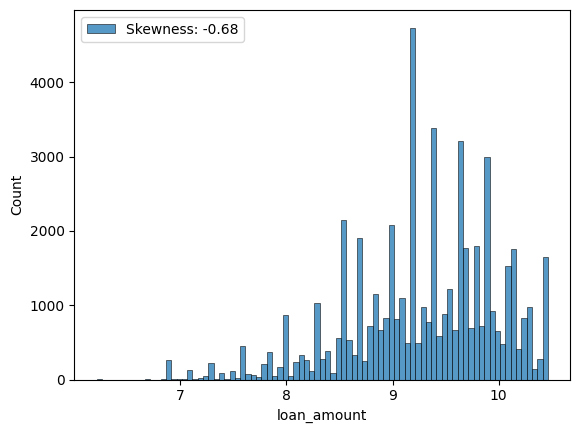

In [36]:
import numpy as np
import seaborn as sns

log_transform = transformed_customer_loans["loan_amount"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_transform,label="Skewness: %.2f"%(log_transform.skew()) )
t.legend()

Let us consider Log transformation on numerical columns

In [37]:
from df_null_imputes import DataFrameTransform
transformer = DataFrameTransform(transformed_customer_loans)
log_transformed_columns = ["loan_amount", "funded_amount", "funded_amount_inv", "term", "instalment", "annual_inc", "out_prncp", "out_prncp_inv", "total_payment", "total_payment_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_payment_amount"]
for column in log_transformed_columns:
    print(f"{column} skew after log transform is: {transformer.log_transform(column)}")



loan_amount skew after log transform is: -0.6775710190311737
funded_amount skew after log transform is: -0.7187849504532033
funded_amount_inv skew after log transform is: -4.383360545426002
term skew after log transform is: 1.146331561835394
instalment skew after log transform is: -0.6675225818935975
annual_inc skew after log transform is: 0.14181830888070776
out_prncp skew after log transform is: 0.573255877508789
out_prncp_inv skew after log transform is: 0.5733299111666511
total_payment skew after log transform is: -0.7539403983723499
total_payment_inv skew after log transform is: -2.7702463905943024
total_rec_prncp skew after log transform is: -0.9161750431419252
total_rec_int skew after log transform is: -0.5635890511324506
total_rec_late_fee skew after log transform is: 5.517524045405416
recoveries skew after log transform is: 3.8210523413653488
collection_recovery_fee skew after log transform is: 5.413146582847341
last_payment_amount skew after log transform is: 0.13082510233520

Let us consider Box-Cox transformation on "loan_amount". Skew before the transformation was 0.804.\
After the transform, skew is -0.04 which is marginally negative but much closer to 0 normal distribution.

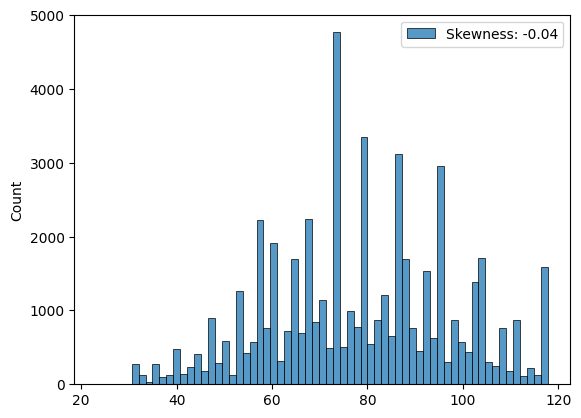

In [38]:
from scipy import stats
boxcox_transform = transformed_customer_loans["loan_amount"]
boxcox_transform = stats.boxcox(boxcox_transform)
boxcox_transform = pd.Series(boxcox_transform[0])
t = sns.histplot(boxcox_transform, label = "Skewness: %.2f"%(boxcox_transform.skew()))
t.legend()

Let us consider Box-Cox transformation of numerical columns that contain no negative values. The other numerical variables raised an error when running Box-Cox transformation that "data must be positive".

In [39]:
transformer = DataFrameTransform(transformed_customer_loans)
box_cox_transformed_columns = ["loan_amount", "funded_amount", "term", "instalment", "annual_inc", "total_payment", "total_rec_int"]
for column in box_cox_transformed_columns:
    print(f"{column} skew after box cox transform is: {transformer.box_cox_transform(column)}")

loan_amount skew after box cox transform is: -0.043080181748105295


funded_amount skew after box cox transform is: -0.030084018008102
term skew after box cox transform is: 0.0
instalment skew after box cox transform is: -0.020677631264510634
annual_inc skew after box cox transform is: -0.01217749168943702
total_payment skew after box cox transform is: -0.013817787786448349
total_rec_int skew after box cox transform is: 0.0017284440012419818


Let us consider Yeo-Johnson transformation on numerical columns, which can also handle columns with negative values. This will enable us to ascertain which transformations are the most effective for each variable (Log, Box-Cox or Yeo-Johnson).

First of all, let us consider a Yeo-Johnson transformation example on the variable "loan_amount"

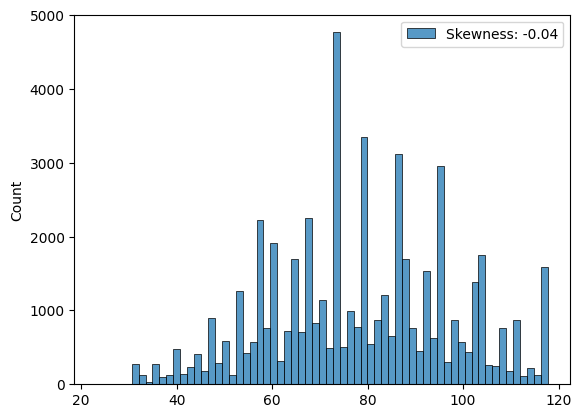

In [40]:
yeojohnson_transform = transformed_customer_loans["loan_amount"]
yeojohnson_transform = stats.yeojohnson(yeojohnson_transform)
yeojohnson_transform = pd.Series(yeojohnson_transform[0])
t=sns.histplot(yeojohnson_transform, label="Skewness: %.2f"%(yeojohnson_transform.skew()) )
t.legend()

Let us now consider Yeo-Johnson transformation for numerical variables including those with negative values.

In [41]:
transformer = DataFrameTransform(transformed_customer_loans)
yeo_johnson_transformed_columns = ["loan_amount", "funded_amount", "funded_amount_inv", "term", "instalment", "annual_inc", "out_prncp", "out_prncp_inv", "total_payment", "total_payment_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_payment_amount"]
for column in yeo_johnson_transformed_columns:
    print(f"{column} skew after yeo johnson transform is: {transformer.yeo_johnson_transform(column)}")

loan_amount skew after yeo johnson transform is: -0.04307089952190794


funded_amount skew after yeo johnson transform is: -0.030079218549894402
funded_amount_inv skew after yeo johnson transform is: -0.03500593127550175
term skew after yeo johnson transform is: 0.0
instalment skew after yeo johnson transform is: -0.02062158871973838
annual_inc skew after yeo johnson transform is: -0.012180699216589534
out_prncp skew after yeo johnson transform is: 0.5291133483287309
out_prncp_inv skew after yeo johnson transform is: 0.529131236755574
total_payment skew after yeo johnson transform is: -0.013839483466551226
total_payment_inv skew after yeo johnson transform is: 0.0061062381937120845
total_rec_prncp skew after yeo johnson transform is: -0.017688787560672627
total_rec_int skew after yeo johnson transform is: 0.0013121255137157758
total_rec_late_fee skew after yeo johnson transform is: 5.288578360829451
recoveries skew after yeo johnson transform is: 3.476459646907448
collection_recovery_fee skew after yeo johnson transform is: 3.6198884800642888
last_payment_

Summary Analysis comparing skew of numerical variables of customer_loans after applying Log, Box-Cox and Yeo-Jonhnson transformations\
Let us consider numerical variables skew after applying Log, Box-Cox and Yeo-Johnson transforms\
We will consider whether the skew after transformation is closer to normal distribution 0, irrespective of whether positive or negative skew.\

-   As can be seen from the analysis, with the exception of two variables ("funded_amount_inv", total_payment_inv") ALL variables analysed produced a skew closer to normal distribution 0 as a result of Log transformation.

-   The seven variables that did not show "positive data only" error when Box-Cox transformation was run were: "loan_amount", "funded_amount", "term", "instalment", "annual_inc" "total_payment" and "total_rec_int". These variables produced skew very close to normal distribution 0 and ALL were far better than those produced by the Log transformation.

-   These same seven variables were run with Yeo-Johnson transformation and produced almost identical results to the Box-Cox transformation. However the skew results for the remaining variables after Yeo-Johnson transformation were very close to normal distribution 0 for the other numerical variables, and again far superior to the Log transformation skew results. 

-   As discussed earlier, I have considered a skew between -0.5 and 0.5 as the threshold for normal distribution. There were three variables that whilst were all closer to normal distribution after Yeo-Johnson transformation, where nonetheless still outside of this threshold: "total_rec_late_fee" (5.289), "recoveries" (3.476), "collection_recovery_fee" (3.620).

-   I have considered "out_prncp" and "out_prncp_inv", both skew 0.529 after Yeo-Johnson transform to be normally distributed.

-   The conclusion, therefore, is that it makes sense to apply Yeo_Johnson transformation to all appropriate numerical variables.

-   There is an argument to also apply Yeo-Johnson to the two variables "int_rate" and "dti" that were considered normally distributed prior to the transformations, as this would likely make them closer to normal distribution skew 0.

In [42]:
transformed_customer_loans.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


Let us now apply the Yeo-Johnson transformation to the appropriate numerical variables, and compare visual plots to sample variables to check to see the effect of the transformations

In [43]:
data_transformer = DataFrameTransform(transformed_customer_loans)
test = data_transformer.yeo_johnson_transform_df("loan_amount")
test.head(10)

Transformed column 'loan_amount':
0       -0.549654
1        0.181977
2        0.500069
3        0.390885
4        0.390885
           ...   
54199   -2.499882
54203   -0.913936
54204   -1.367250
54221   -1.016877
54227   -1.125991
Name: loan_amount, Length: 54100, dtype: float64


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,-0.549654,8000.0,8000.0,36.0,7.49,248.82,0,3,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,0.181977,13200.0,13200.0,36.0,6.99,407.52,0,2,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,0.500069,16000.0,16000.0,36.0,7.49,497.63,0,3,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,0.390885,15000.0,15000.0,36.0,14.31,514.93,2,13,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,0.390885,15000.0,15000.0,36.0,6.03,456.54,0,0,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,-1.807384,2525.0,2525.0,36.0,11.44,83.20,1,8,1.0,OWN,32000.0,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1842.68,1842.68,913.60,913.60,682.32,231.28,0.0,0.0,0.0,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,-0.783326,6675.0,6675.0,36.0,21.99,254.89,4,24,7.0,RENT,13536.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,3,4,0.00,0.00,6963.53,6963.53,6675.00,288.53,0.0,0.0,0.0,2021-03-01,6724.95,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,1.447153,26500.0,26200.0,36.0,19.99,701.95,4,22,1.0,RENT,78000.0,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,10,37,0.00,0.00,4182.27,4134.92,1197.35,2984.92,0.0,0.0,0.0,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,-0.239894,10000.0,10000.0,60.0,12.99,227.48,2,11,1.0,RENT,50048.0,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,8480.91,8480.91,2722.54,2722.54,1519.09,1203.45,0.0,0.0,0.0,2022-01-01,227.48,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,-0.239894,12000.0,10000.0,36.0,8.19,314.25,0,4,11.0,MORTGAGE,103000.0,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,6934.63,6934.63,3766.45,3766.45,3065.37,701.08,0.0,0.0,0.0,2022-01-01,314.25,2022-01-01,0.0,1,INDIVIDUAL


We previously looked at QQ Plot and KDE Plot for "loan_amount" which had a skew of 0.804. Let us consider how these plots look after the Yeo-Johnson transformation, and compare how they have changed.

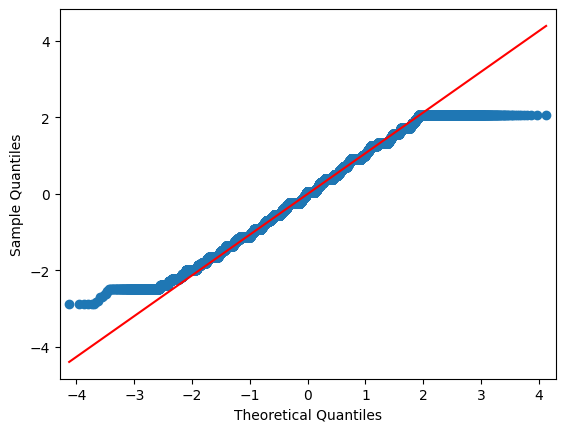

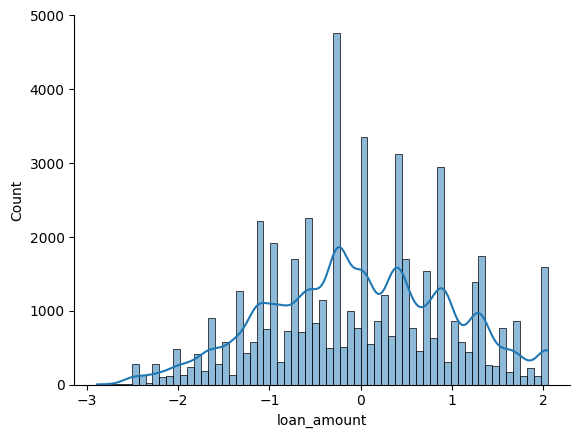

In [44]:
from data_visualisation import Plotter
qq_plot_var = Plotter(transformed_customer_loans)
qq_plot_var.qq_plotter("loan_amount", transformed_customer_loans)

kde_var = Plotter(transformed_customer_loans)
kde_var.kernel_density_estimate_plot("loan_amount", transformed_customer_loans)

Conclusion from visual plots. Skew "loan_amount" after Yeo-Johnson transformation is -0.043, which is marginally negative skew but significantly close to normal distribution skew 0. The effect on the transformed QQ Plot is very significant where it is very apparent that the transformed data closely follows the theoretical normal distribution. The KDE plot also looks slightly more symmetrical, but the shift towards slight negative skew is also visible. Hence, it is apparent that the Yeo-Johnson transformation has transformed "loan_amount" to close to normal distribution.

Let us apply Yeo-Johnson transform to appropriate numerical columns:

In [45]:
transformer = DataFrameTransform(transformed_customer_loans)

data_transformer.yeo_johnson_transform_df("funded_amount")
data_transformer.yeo_johnson_transform_df("funded_amount_inv")
data_transformer.yeo_johnson_transform_df("instalment")
data_transformer.yeo_johnson_transform_df("annual_inc")
data_transformer.yeo_johnson_transform_df("out_prncp")
data_transformer.yeo_johnson_transform_df("out_prncp_inv")
data_transformer.yeo_johnson_transform_df("total_payment")
data_transformer.yeo_johnson_transform_df("total_payment_inv")
data_transformer.yeo_johnson_transform_df("total_rec_prncp")
data_transformer.yeo_johnson_transform_df("total_rec_int")
data_transformer.yeo_johnson_transform_df("total_rec_late_fee")
data_transformer.yeo_johnson_transform_df("recoveries")
data_transformer.yeo_johnson_transform_df("collection_recovery_fee")
data_transformer.yeo_johnson_transform_df("last_payment_amount")

transformed_customer_loans.head(10)

Transformed column 'funded_amount':
0       -0.561544
1        0.194780
2        0.524518
3        0.411278
4        0.411278
           ...   
54199   -2.558535
54203   -0.936900
54204   -1.402686
54221   -1.042806
54227   -1.154980
Name: funded_amount, Length: 54100, dtype: float64
Transformed column 'funded_amount_inv':
0       -0.493251
1        0.209353
2        0.523514
3        0.415118
4        0.415118
           ...   
54199   -3.268822
54203   -2.491017
54204   -1.954471
54221   -0.935538
54227   -1.677793
Name: funded_amount_inv, Length: 54100, dtype: float64
Transformed column 'instalment':
0       -0.526585
1        0.229113
2        0.572920
3        0.634101
4        0.421743
           ...   
54199   -2.531859
54203   -0.871696
54204   -1.391007
54221   -0.918179
54227   -1.082900
Name: instalment, Length: 54100, dtype: float64
Transformed column 'annual_inc':
0       -0.559188
1       -0.399208
2        0.339872
3       -0.734670
4        1.573004
           ...   
54

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,-0.549654,-0.561544,-0.493251,36.0,7.49,-0.526585,0,3,6.0,MORTGAGE,-0.559188,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,1.306093,1.306185,-1.399363,-1.282241,-1.211550,-1.132125,-0.182815,-0.267142,-0.258136,2022-01-01,-0.741488,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,0.181977,0.194780,0.209353,36.0,6.99,0.229113,0,2,10.0,RENT,-0.399208,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,1.352251,1.352339,-0.897022,-0.828747,-0.726371,-0.766434,-0.182815,-0.267142,-0.258136,2022-01-01,-0.430195,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,0.500069,0.524518,0.523514,36.0,7.49,0.572920,0,3,9.0,MORTGAGE,0.339872,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,-0.772512,-0.772509,0.740120,0.753975,1.026411,-0.726361,-0.182815,-0.267142,-0.258136,2021-10-01,1.576033,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,0.390885,0.411278,0.415118,36.0,14.31,0.634101,2,13,2.0,RENT,-0.734670,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,-0.772512,-0.772509,0.656052,0.669237,0.925749,-0.601848,-0.182815,-0.267142,-0.258136,2021-06-01,1.618306,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,0.390885,0.411278,0.415118,36.0,6.03,0.421743,0,0,11.0,MORTGAGE,1.573004,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,1.363023,1.363110,-0.770388,-0.711815,-0.580590,-0.785590,-0.182815,-0.267142,-0.258136,2022-01-01,-0.359400,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,-1.807384,-1.853348,-1.624658,36.0,11.44,-1.812708,1,8,1.0,OWN,-1.265118,Source Verified,2021-01-01,Current,n,home_improvement,6.60,1,2011-03-01,0,3,4,1.187814,1.187915,-2.341390,-2.082137,-2.152725,-1.742953,-0.182815,-0.267142,-0.258136,2022-01-01,-1.391739,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,-0.783326,-0.802421,-0.711286,36.0,21.99,-0.492533,4,24,7.0,RENT,-3.003119,Verified,2021-01-01,Fully Paid,n,debt_consolidation,16.13,0,2006-11-01,2,3,4,-0.772512,-0.772509,-0.487672,-0.447193,-0.180963,-1.580998,-0.182815,-0.267142,-0.258136,2021-03-01,1.221855,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,1.447153,1.509120,1.462606,36.0,19.99,1.222288,4,22,1.0,RENT,0.440253,Source Verified,2021-01-01,Charged Off,n,debt_consolidation,13.71,0,2001-03-01,0,10,37,-0.772512,-0.772509,-1.063207,-0.991432,-1.786749,0.541495,-0.182815,-0.267142,-0.258136,2021-08-01,-0.094263,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,-0.239894,-0.241707,-0.199336,60.0,12.99,-0.650846,2,11,1.0,RENT,-0.397372,Source Verified,2021-01-01,Current,n,credit_card,20.67,0,2005-11-01,0,8,11,1.345957,1.346045,-1.484386,-1.357272,-1.611695,-0.380855,-0.182815,-0.267142,-0.258136,2022-01-01,-0.798721,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,-0.239894,0.039873,-0.199336,36.0,8.19,-0.184723,0,4,11.0,MORTGAGE,0.953532,Not Verified,2021-01-01,Current,n,credit_card,15.95,0,2002-02-01,1,14,35,1.327591,1.327681,-1.170975,-1.078171,-1.013793,-0.868165,-0.182815,-0.267142,-0.258136,2022-01-01,-0.593418,2022-01-01,0.0,1,INDIVIDUAL


#TO DO: consider how to convert trasnformed columns back to meaningful form. 

Let us consider box plot for "int_rate", to visually inspect for outliers. As can be seen, the upper fence is 23.7, whereas the max value exceeds that at 26.06.

In [46]:
from data_visualisation import Plotter
box_plot_var = Plotter(transformed_customer_loans)
box_plot_var.box_and_whiskers_plot("int_rate", transformed_customer_loans)
print(transformed_customer_loans["int_rate"].max())
print(transformed_customer_loans["int_rate"].min())

26.06
5.42


Now that appropriate numerical columns have been transformed to normal distribution, we can use Z-Score to detect the presence of any outliers, where Z-score > 3.

In [47]:
import numpy as np
mean_column = np.mean(transformed_customer_loans["loan_amount"])
std_column = np.std(transformed_customer_loans["loan_amount"])
z_score = (transformed_customer_loans["loan_amount"] - mean_column) / std_column
print(z_score)
outliers = z_score.abs() > 3
df_outliers = transformed_customer_loans[outliers]
df_outliers.tail(25)


0       -0.549654
1        0.181977
2        0.500069
3        0.390885
4        0.390885
           ...   
54199   -2.499882
54203   -0.913936
54204   -1.367250
54221   -1.016877
54227   -1.125991
Name: loan_amount, Length: 54100, dtype: float64


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type


In [56]:
from df_null_imputes import DataFrameTransform
z_scores_columns = [
"loan_amount", 
"funded_amount",
"funded_amount_inv", 
"instalment", "annual_inc", 
"out_prncp", 
"out_prncp_inv", 
"total_payment", 
"total_payment_inv", 
"total_rec_prncp", 
"total_rec_int", 
"total_rec_late_fee", 
"recoveries", 
"collection_recovery_fee", 
"last_payment_amount"
]
transformer = DataFrameTransform(transformed_customer_loans)
for column in z_scores_columns:
    transformer.z_scores(column)
    
    

0       -0.549654
1        0.181977
2        0.500069
3        0.390885
4        0.390885
           ...   
54199   -2.499882
54203   -0.913936
54204   -1.367250
54221   -1.016877
54227   -1.125991
Name: loan_amount, Length: 54100, dtype: float64
0       -0.561544
1        0.194780
2        0.524518
3        0.411278
4        0.411278
           ...   
54199   -2.558535
54203   -0.936900
54204   -1.402686
54221   -1.042806
54227   -1.154980
Name: funded_amount, Length: 54100, dtype: float64
0       -0.493251
1        0.209353
2        0.523514
3        0.415118
4        0.415118
           ...   
54199   -3.268822
54203   -2.491017
54204   -1.954471
54221   -0.935538
54227   -1.677793
Name: funded_amount_inv, Length: 54100, dtype: float64
0       -0.526585
1        0.229113
2        0.572920
3        0.634101
4        0.421743
           ...   
54199   -2.531859
54203   -0.871696
54204   -1.391007
54221   -0.918179
54227   -1.082900
Name: instalment, Length: 54100, dtype: float64
0    

#TO DO: how do I visualise using Plotter which variables have outliers? Box plot would work but am I supposed to apply to all 15 numercial variables?
#TO DO: write a method to test for whether any z_score values > 3\
#TO DO: apply this method to appropriate columns to identify any outliers\
#TO DO: decide how to treat outliers. If appropriate write a method to remove rows with outliers or impute\
#TO DO: once done visualise with plot after outliers removed

Let us analyse Correlation Heatmap for numerical variables, and consider those variables with a correlation coefiicient of >0.9 as being highly correlated.

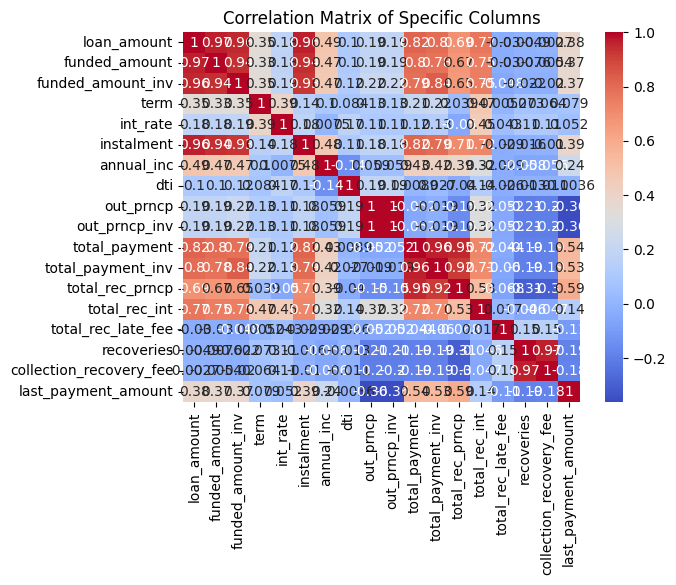

In [50]:
from data_visualisation import Plotter
import matplotlib.pyplot as plt
heatmap_var = Plotter(transformed_customer_loans)
heatmap_var.correlation_heatmap(transformed_customer_loans)
plt.title("Correlation Matrix of Specific Columns")
plt.yticks(rotation = 0)
plt.show()


Based on the above matrix, those variables that are considered highly correlated are:

"loan_amount" is highly correlated to "funded_amount", "funded_amount_inv" and "instalment"
"funded_amount" is highly correlated to " loan_amount", "funded_amount_inv" and "instalment" 
"funded_amount_inv" is highly correlated to "funded_amount", "instalment" and "loan_amount"
"out_prncp" is highly correlated to "out_prncp_inv"
"total_payment" is highly correlated to "total_payment_inv" and "total_rec_prncp"
"total_payment_inv" is highly correlated to "total_payment" and "total_rec_prncp"
"total_rec_prncp" is highly correlated to "total_payment" and "total_payment_inv"
"recoveries" is highly correlated to "collection_recovery_fee"

#TO DO: can the correlation heatmap be increased in size to allow coefficients to be read properly?
#TO DO: decide which variables are too closely correlated and whether which should be dropped. Consider VIF? Most likely variables to consider dropping one: "funded_amount" v "funded_amount_inv", "total_payment" v "total_payment_inv" and "recoveries" v "collection_recovery_fee"\
#TO DO: remove columns that are too highly correlated using method written previously